Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc5 in position 24: invalid continuation byte
c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\si

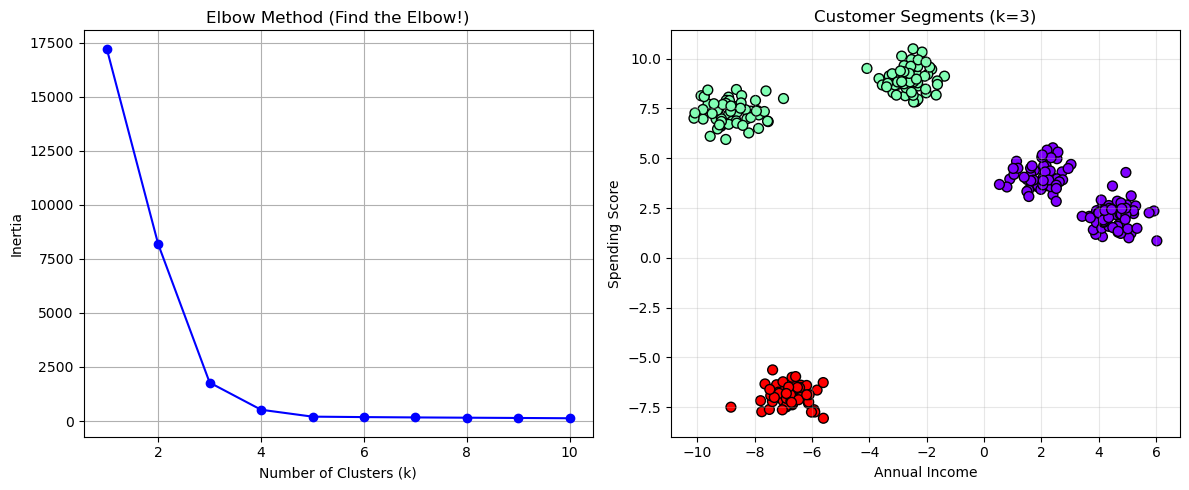

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=42)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # 군집 내 오차 제곱합

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method (Find the Elbow!)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

optimal_k = 3

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y_pred = kmeans_final.fit_predict(X)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow', edgecolor='k', s=50)
plt.title(f'Customer Segments (k={optimal_k})')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()